---
title: 'Lab 5'
author: "Hunter Blinkenberg"
embed-resources: true
format: 
    html:
        toc: true
        code-fold: false
        theme: cosmo
        echo: true
---

In [23]:
import pandas as pd
import numpy as np
import plotnine as plt
from plotnine import *
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Part One: Data Exploration

## 1. 

In [8]:
url = "https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1"
data = pd.read_csv(url)

In [9]:
data.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [10]:
data['age'].mean()

np.float64(37.96055684454756)

In [11]:
data.groupby('region').mean('age')

,age,bmi,charges
region,,,
northeast,38.777778,29.670787,11985.217747
northwest,37.021053,28.974000,11097.220696
southeast,37.328000,33.749760,13916.786760
southwest,38.737864,29.958252,11765.159818


In [12]:
data.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


## 2. data seems to be in good shape so far, will need to dummify categorical variables though.

## 3.

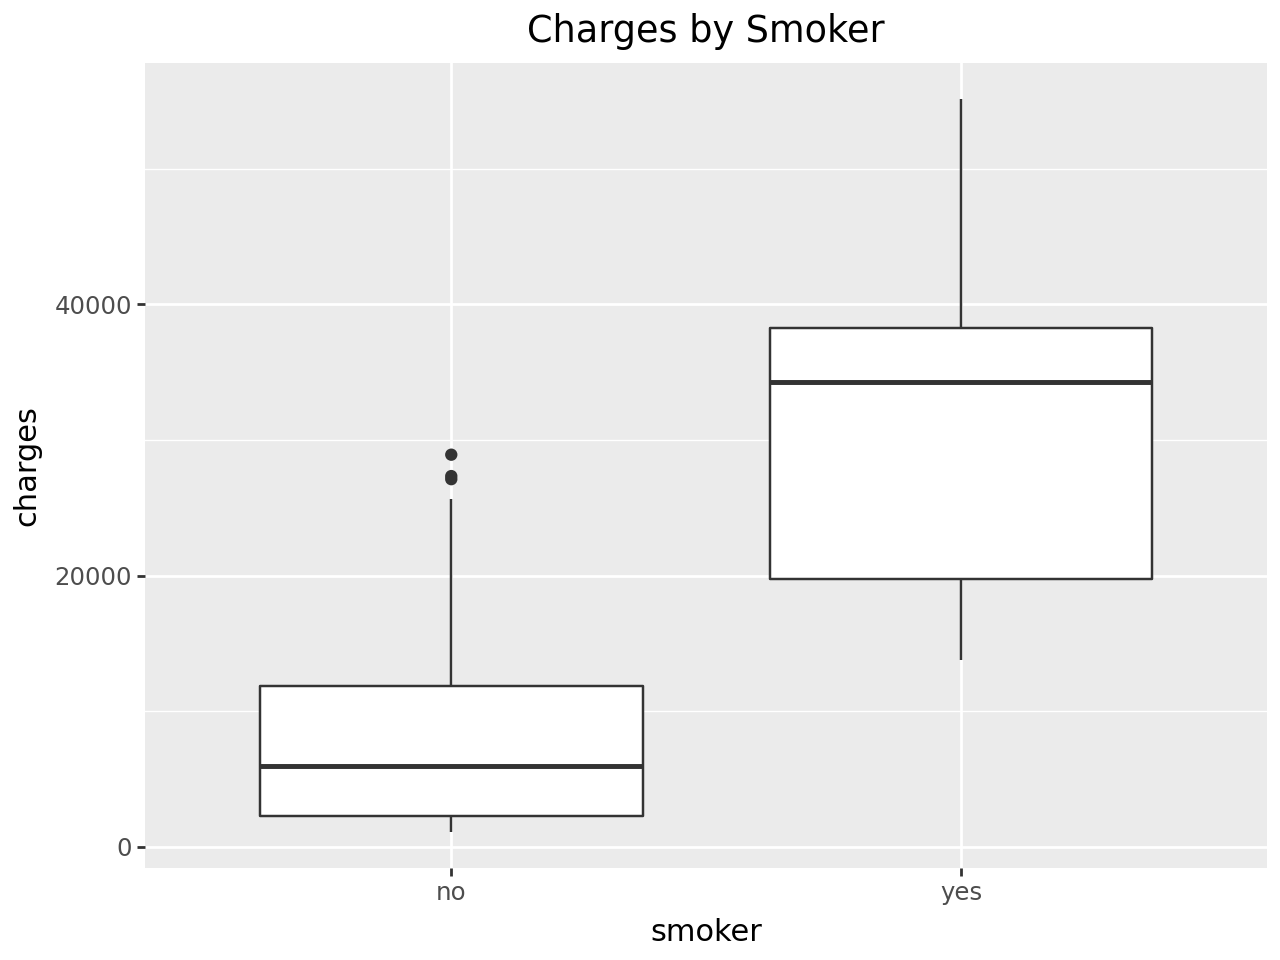

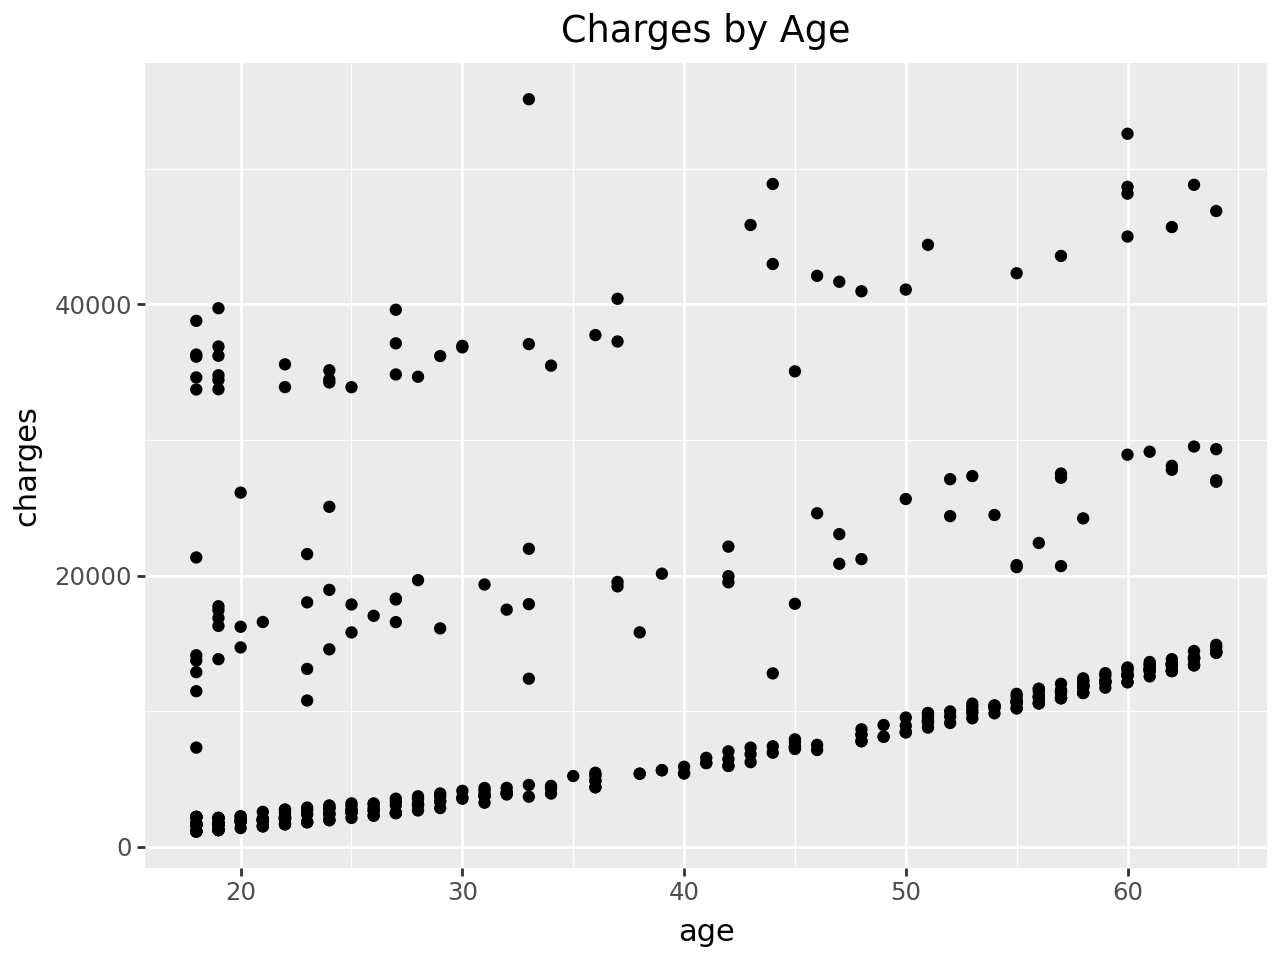

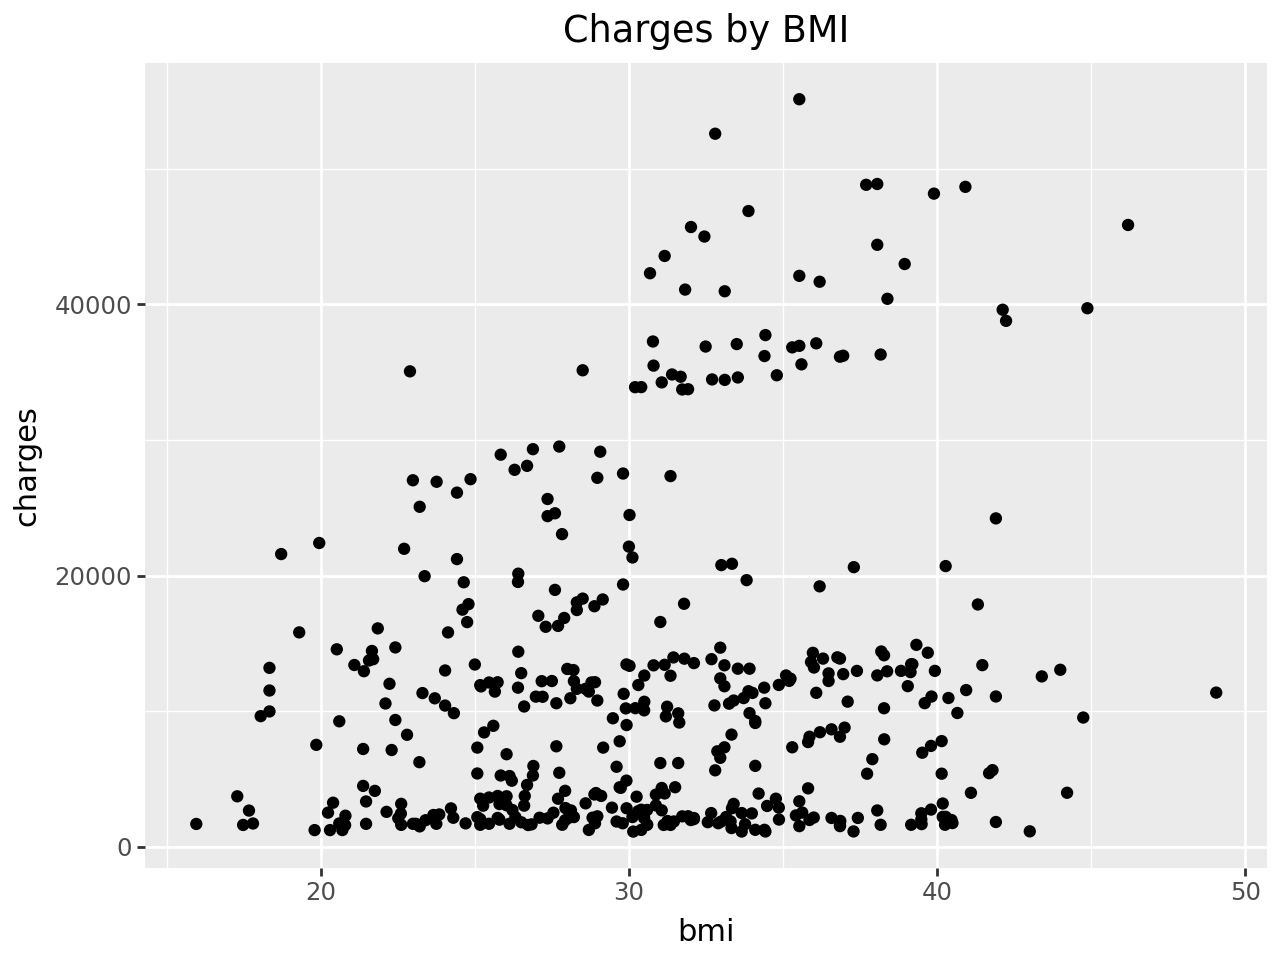

In [13]:
print(ggplot(data, aes(x= "smoker", y = "charges"))+ geom_boxplot() + labs()
+ ggtitle("Charges by Smoker"))

print(ggplot(data, aes(x= "age", y = "charges"))+ geom_point() + labs()
+ ggtitle("Charges by Age"))

print(ggplot(data, aes(x= "bmi", y = "charges"))+ geom_point() + labs()
+ ggtitle("Charges by BMI"))

Smoker: Charges seem to be significantly higher for those who smoke than those who do not. 

Age: There seems to be 3 distinct lines for charges, but all have a positice slope, increasing with age. Maybe the distinct lines have to do with smoking?

BMI: The relationship seems to be positive, with an increase in charges over a BMI of 30. This could also have to do with smokers?

# Part Two: Simple Linear Models

## 1.

In [ ]:
y = data['charges']
X = data.drop("charges", axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 52)


In [26]:
ct_dummies = ColumnTransformer(
  [("standardize", StandardScaler(), ["age"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['linear_regression'].coef_
intercept = lr_pipeline['linear_regression'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 100934882.09433998
R-squared: 0.14425695977912856
Coefficient: [3592.14285684]
Intercept: 12373.561274083591


The MSE is extremely high, and the R-squared is very low for this model. The coefficient of 218 means that according to the model, an increase in 1 year of age would cause an increase in $218 in charges. The intercept means that at age 0 the charges would be $4078.

## 2. 

In [34]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(drop = 'first', sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["age"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("lr", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline.named_steps['lr'].coef_
intercept = lr_pipeline.named_steps['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")


MSE: 100757297.75687246
R-squared: 0.14576254989512072
Coefficient: [ 178.71374474 3591.15183752]
Intercept: 12286.140928357236


## 3.

In [33]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(drop = 'first', sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("lr", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['lr'].coef_
intercept = lr_pipeline['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 43615816.8972016
R-squared: 0.6302177108757814
Coefficient: [25558.89427226  4315.51229674]
Intercept: 7230.13053818015


## 4.

The model using smoker (Q3) fits the data much better with an R^2 value of .63. The MSE for Q3 is also better than in Q2. 

# Part Three: Multiple Linear Models

# 1. 

In [35]:
ct_dummies = ColumnTransformer(
  [#("dummify", OneHotEncoder(drop = 'first', sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age", "bmi"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("lr", LinearRegression())]
).set_output(transform="pandas")


lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['lr'].coef_
intercept = lr_pipeline['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 98211786.13542509
R-squared: 0.16734382892033373
Coefficient: [3327.10896447 1751.25159417]
Intercept: 12373.561274083591


The model fits relatively poorly using these two variables as predictors. The MSE is very high and the R2 score is only .17. However, it does perform slightly better than P2 Q1. 

## 2. 

In [93]:
ct_dummies = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
   ("interaction", PolynomialFeatures(interaction_only = True, include_bias= False)),
  ("lr", LinearRegression())]
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['lr'].coef_
intercept = lr_pipeline['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 96693578.92061837
R-squared: 0.18021544704408266
Coefficient: [3359.27586938 1762.7612084  -623.59864206]
Intercept: 12467.93650601971


The MSE is lower and the R2 is higher in this model than P2 Q1 by about .04. 

## 3. 

In [ ]:
ct_dummies = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
   ("poly", PolynomialFeatures(degree= 4, include_bias= False)),
  ("lr", LinearRegression())]
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['lr'].coef_
intercept = lr_pipeline['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 101093647.49157703
R-squared: 0.14291091982847492
Coefficient: [ 2466.16111693 -1923.34055806   875.97352227   419.72869003]
Intercept: 13505.29681881389


The MSE and R2 are relatively equal to P2 Q1

## 4. 

In [ ]:
ct_dummies = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
   ("poly", PolynomialFeatures(degree= 12, include_bias= False)),
  ("lr", LinearRegression())]
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['lr'].coef_
intercept = lr_pipeline['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 103369058.23705713
R-squared: 0.12361960181545695
Coefficient: [ -11813.95710201   15715.96289588  168503.94434576  -20629.49486988
 -559041.06567513   36170.35898277  786362.59302756 -129835.76536121
 -497308.97818208  141154.06306412  116622.74298226  -45161.3131477 ]
Intercept: 11629.765335326925


The MSE and R2 are slightly less than P2 Q1. 

## 5.
The best model is the interaction model from P3 Q2. I do agree because it makes sense that as age and bmi will interact in a positive way and possibly grow as the other grows. 

## 6. 

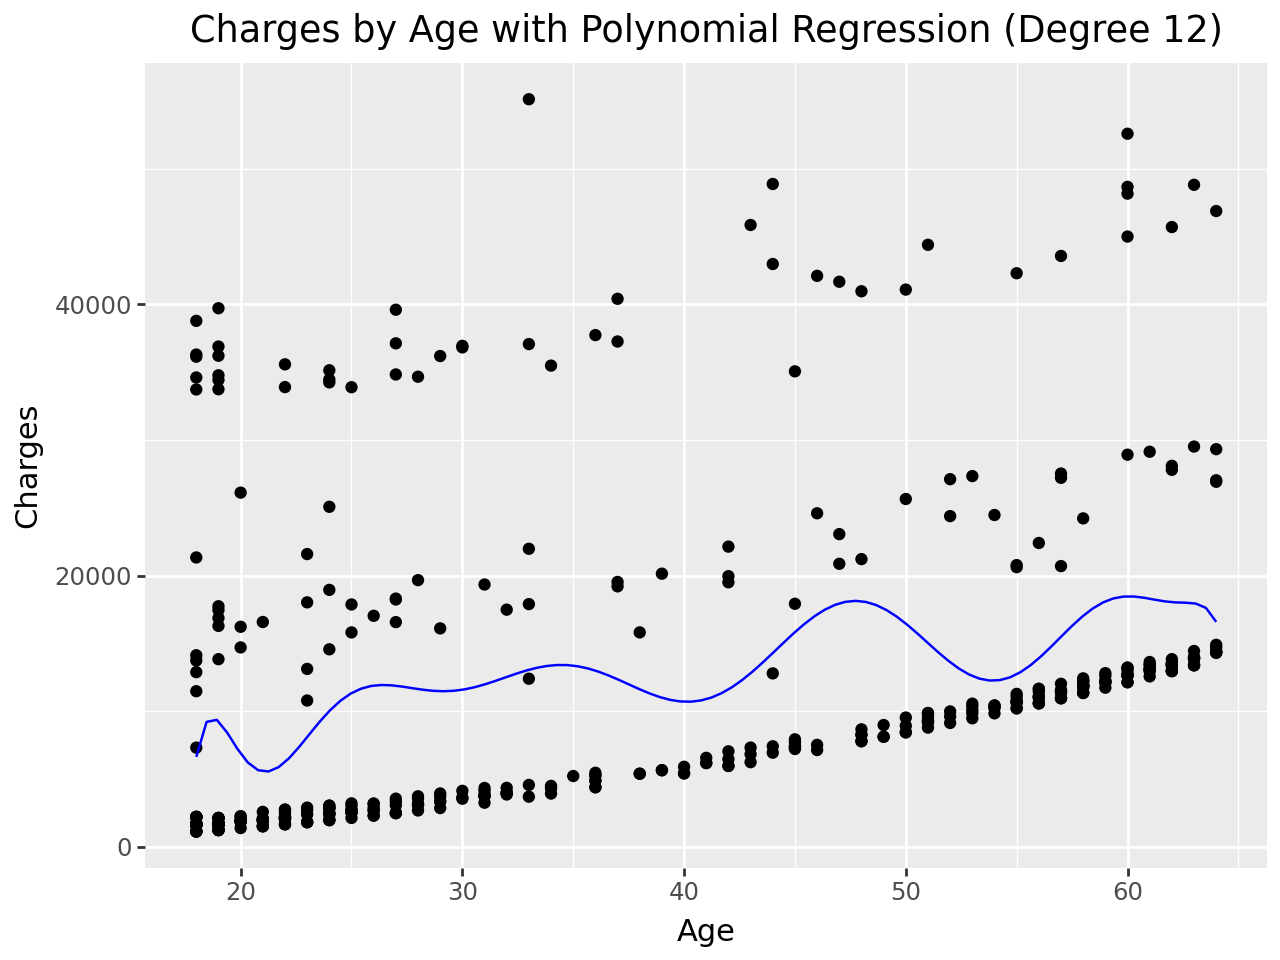

In [ ]:
ct_dummies = ColumnTransformer(
    [
     ("standardize", StandardScaler(), ["age"])],
    remainder="drop"
)

# Create your pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("poly", PolynomialFeatures(degree=12, include_bias=False)),
     ("lr", LinearRegression())]
)

# Fit your model
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = lr_pipeline['lr'].coef_
intercept = lr_pipeline['lr'].intercept_

# Prepare input for prediction
age_range = np.linspace(data['age'].min(), data['age'].max(), 100).reshape(-1, 1)

# Create a DataFrame for input data with other features set to defaults (zeros)
# Assuming there are 3 other features (adjust as necessary)
num_additional_features = X_train.shape[1] - 1  # Adjust based on your dataset
default_values = np.zeros((age_range.shape[0], num_additional_features))  # Create zeros for additional features

# Combine into a DataFrame
input_data = pd.DataFrame(np.hstack((age_range, default_values)), 
                          columns=['age'] + [f'feature_{i}' for i in range(num_additional_features)])

# Make predictions
predictions = lr_pipeline.predict(input_data)

# Create a DataFrame for the predicted values
predicted_data = pd.DataFrame({
    'age': age_range.flatten(),
    'predicted_charges': predictions
})

# Create the ggplot with the prediction line
plot = (ggplot(data, aes(x='age', y='charges')) + 
        geom_point() + 
        geom_line(aes(x='age', y='predicted_charges'), data=predicted_data, color='blue') + 
        labs(x='Age', y='Charges') + 
        ggtitle("Charges by Age with Polynomial Regression (Degree 12)")) 
print(plot)


# Part Four: New data

In [47]:
ndata = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

In [48]:
y1 = ndata['charges']
X1 = ndata.drop("charges", axis=1)
y = data['charges']
X = data.drop("charges", axis=1)


## Age as predictor

In [51]:

ct_dummies = ColumnTransformer(
  [("standardize", StandardScaler(), ["age"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("linear_regression", LinearRegression())]
)


lr_pipeline.fit(X, y)
y_pred = lr_pipeline.predict(X1)

mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 136077136.50195494
R-squared: 0.12236515675533055


## Age and BMI as predictors

In [52]:
ct_dummies = ColumnTransformer(
  [("standardize", StandardScaler(), ["age", "bmi"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("linear_regression", LinearRegression())]
)


lr_pipeline.fit(X, y)
y_pred = lr_pipeline.predict(X1)

mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 132636406.1108129
R-squared: 0.14455628272331222


## Age, BMI, and Smoker as predictors

In [ ]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(drop = 'first', sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age", "bmi"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("linear_regression", LinearRegression())]
)


lr_pipeline.fit(X, y)
y_pred = lr_pipeline.predict(X1)

mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 35377541.24141632
R-squared: 0.7718311565047801


## Age, BMI, and interaction with Smoker 

In [115]:
ct_dummies = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["standardize__age", "standardize__bmi","dummify__smoker_yes"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("interaction", ct_inter),
     ("linear_regression", LinearRegression())]
)

# Fit the pipeline on old data
lr_pipeline.fit(X, y)

# Make predictions on new data
y_pred = lr_pipeline.predict(X1)

# Calculate metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 21785261.846899692
R-squared: 0.8594950969902779


## Age, BMI, and Smoker as predictors with an interaction with smoker 

MSE: 21532023.680487454
R-squared: 0.8611283665034086


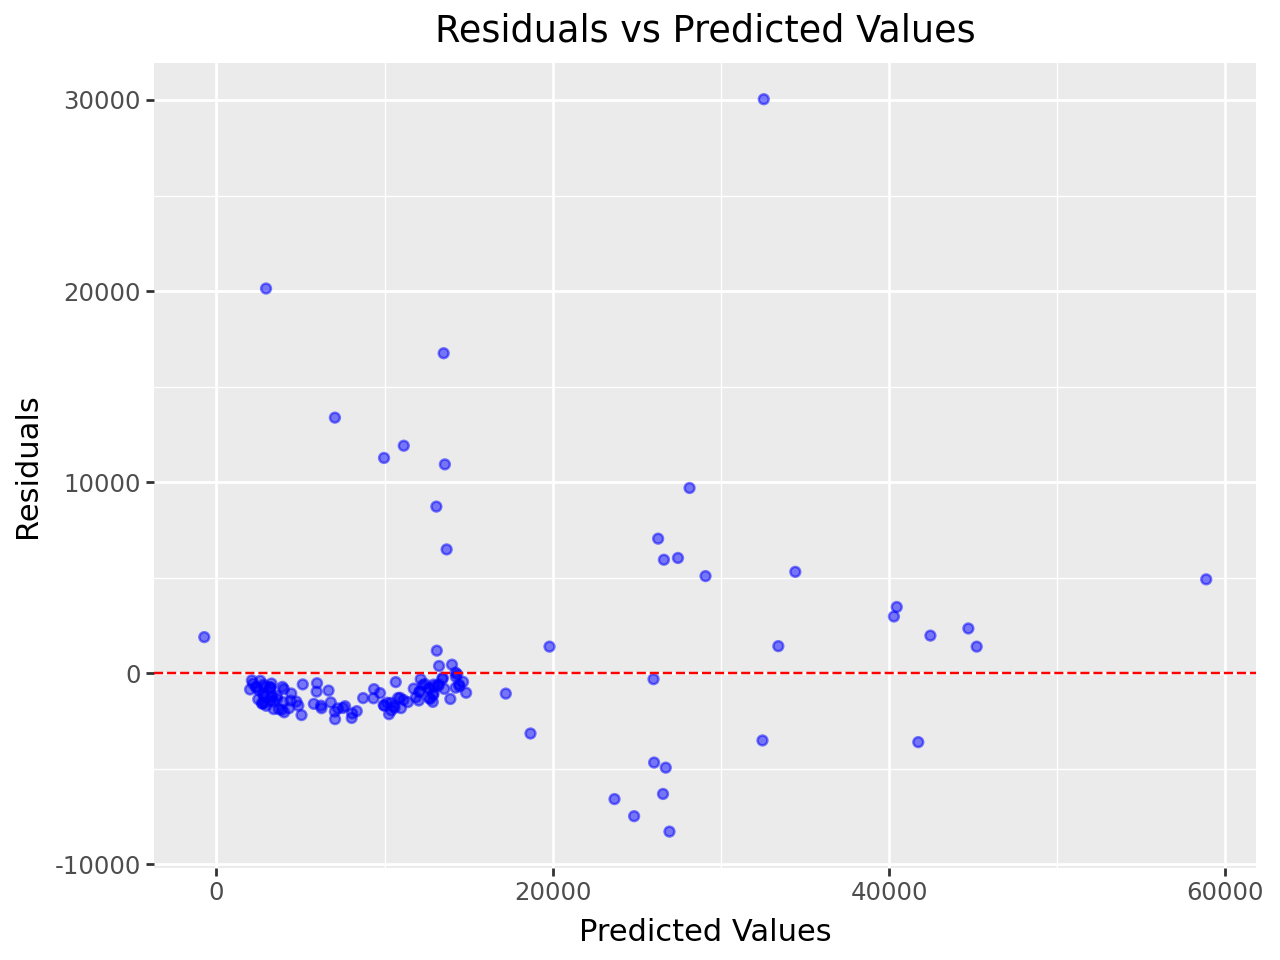

In [121]:
ct_dummies = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = False), ["standardize__age", "standardize__bmi","dummify__smoker_yes"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("interaction", ct_inter),
     ("linear_regression", LinearRegression())]
)

# Fit the pipeline on old data
lr_pipeline.fit(X, y)

# Make predictions on new data
y_pred = lr_pipeline.predict(X1)

# Calculate metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_hline, labs, theme

# Calculate residuals
residuals = y1 - y_pred

# Create a DataFrame for the residuals and predicted values
residuals_df = pd.DataFrame({'Predicted': y_pred, 'Residuals': residuals})

# Create the residual plot using plotnine
plot = (ggplot(residuals_df, aes(x='Predicted', y='Residuals')) +
        geom_point(color='blue', alpha=0.5) +  # Scatter points
        geom_hline(yintercept=0, color='red', linetype='dashed') +  # Horizontal line at y=0
        labs(title='Residuals vs Predicted Values',
             x='Predicted Values',
             y='Residuals') )

print(plot)

The best model seems to be the "~ (age + bmi)*smoker" model with a MSE of 21785261 and an R2 of .861. The residual plot is shown underneath it.

# Part Five: Full Exploration

All variables

In [61]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(drop = 'first', sparse_output = False), ["smoker", "sex", "region"]),
    ("standardize", StandardScaler(), ["age", "bmi"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("linear_regression", LinearRegression())]
)


lr_pipeline.fit(X, y)
y_pred = lr_pipeline.predict(X1)

mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 36021379.54348738
R-squared: 0.7676786960559601


All no sex

In [64]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(drop = 'first', sparse_output = False), ["smoker", "region"]),
    ("standardize", StandardScaler(), ["age", "bmi"])],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct_dummies),
  ("linear_regression", LinearRegression())]
)


lr_pipeline.fit(X, y)
y_pred = lr_pipeline.predict(X1)

mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 35952428.95296544
R-squared: 0.7681233956010852


Interaction with age, bmi, smoker, and region

In [127]:
ct_dummies = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker", "region"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["standardize__age", "standardize__bmi","dummify__smoker_yes", "dummify__region_northwest",
                                                                   "dummify__region_southeast", "dummify__region_southwest"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("interaction", ct_inter),
     ("linear_regression", LinearRegression())]
)

# Fit the pipeline on old data
lr_pipeline.fit(X, y)

# Make predictions on new data
y_pred = lr_pipeline.predict(X1)

# Calculate metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 23934264.744877383
R-squared: 0.8456350182879906


Main effects and interaction with age, bmi, smoker, and region

In [126]:
ct_dummies = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker", "region"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = False), ["standardize__age", "standardize__bmi","dummify__smoker_yes", "dummify__region_northwest",
                                                                   "dummify__region_southeast", "dummify__region_southwest"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("interaction", ct_inter),
     ("linear_regression", LinearRegression())]
)

# Fit the pipeline on old data
lr_pipeline.fit(X, y)

# Make predictions on new data
y_pred = lr_pipeline.predict(X1)

# Calculate metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 23769330.925321553
R-squared: 0.8466987654434104


2nd degree and interactions with smoker, region, age, bmi

In [128]:
ct_dummies = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker", "region"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(degree = 2, interaction_only = False), ["standardize__age", "standardize__bmi","dummify__smoker_yes", "dummify__region_northwest",
                                                                   "dummify__region_southeast", "dummify__region_southwest"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("interaction", ct_inter),
     ("linear_regression", LinearRegression())]
)

# Fit the pipeline on old data
lr_pipeline.fit(X, y)

# Make predictions on new data
y_pred = lr_pipeline.predict(X1)

# Calculate metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 23769330.925321553
R-squared: 0.8466987654434104


MSE: 21532023.680487454
R-squared: 0.8611283665034086


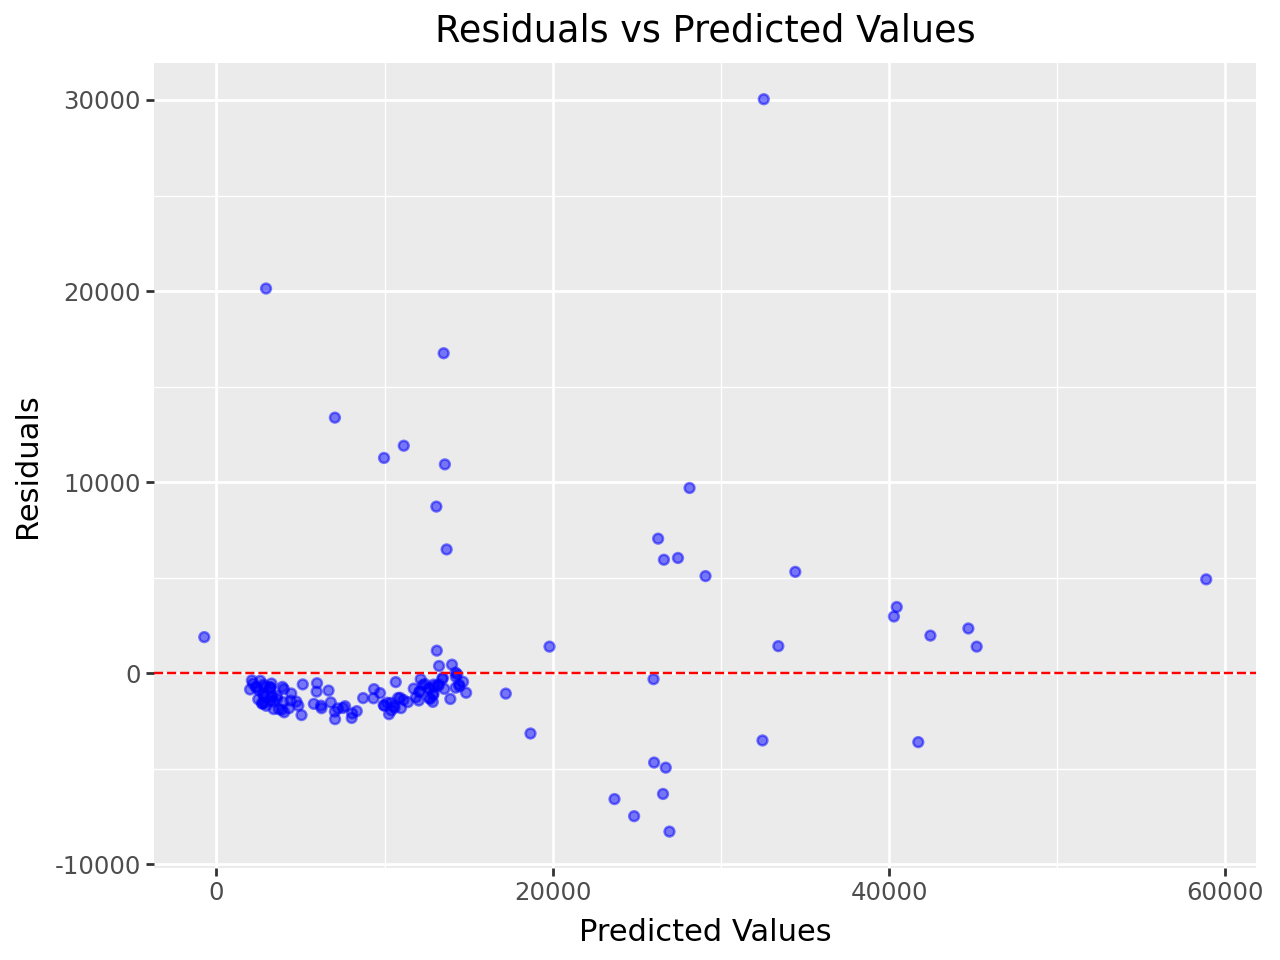

In [135]:
ct_dummies = ColumnTransformer(
    transformers=[
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker"]),
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(degree = 2, interaction_only = False), ["standardize__age", "standardize__bmi","dummify__smoker_yes"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

# Define the pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("interaction", ct_inter),
     ("linear_regression", LinearRegression())]
)

# Fit the pipeline on old data
lr_pipeline.fit(X, y)

# Make predictions on new data
y_pred = lr_pipeline.predict(X1)

# Calculate metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

residuals = y1 - y_pred

# Create a DataFrame for the residuals and predicted values
residuals_df = pd.DataFrame({'Predicted': y_pred, 'Residuals': residuals})

# Create the residual plot using plotnine
plot = (ggplot(residuals_df, aes(x='Predicted', y='Residuals')) +
        geom_point(color='blue', alpha=0.5) +  # Scatter points
        geom_hline(yintercept=0, color='red', linetype='dashed') +  # Horizontal line at y=0
        labs(title='Residuals vs Predicted Values',
             x='Predicted Values',
             y='Residuals') )  # Optional: customize the theme

print(plot)

It seems that this is the model with the highest R^2 score of .861, and the plot of the residuals is also included. It is the same model at the end of part 4. I could not find any other model with any combination of degree or variables than this one. 

References and Ethics Statement: This lab attempted to predict insurance costs and explore linear regression in python. There were no outside sources used that would need to be linked, but generative AI was used for assistance in portions of the project such as plotting desired lines on top of the data presented in the graph, and general code debugging. 